# Projeções Realistas para Exportação de Vinhos Brasileiros

## Objetivo
Desenvolver projeções futuras realistas baseadas em cenários conservadores de crescimento:

**Cenários de Crescimento:**
- **Pessimista:** 5% de crescimento anual
- **Normal:** 10% de crescimento anual  
- **Otimista:** 25% de crescimento anual
- **Tendência:** Baseado na linha de tendência histórica

**Fatores Considerados:**
- Implementação das recomendações de melhoria identificadas
- Análise de toda a cadeia produtiva
- Prospecções futuras e ações para melhoria das exportações

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (16, 10)
sns.set_palette("Set2")

## 1. Carregamento e Preparação dos Dados Integrados

In [2]:
# Carregamento de todas as bases de dados
df_producao = pd.read_csv('Database/Producao.csv', sep=';')
df_comercializacao = pd.read_csv('Database/Comercializacao.csv', sep=';')
df_processamento = pd.read_csv('Database/Processamento.csv', sep=';')
df_exportacao = pd.read_csv('Database/Exportacao.csv', sep=';')
df_importacao = pd.read_csv('Database/Importacao.csv', sep=';')

# Período de análise (2009-2023)
anos_analise = [str(ano) for ano in range(2009, 2024)]

# Função para consolidar dados anuais
def consolidar_dados(df, anos, excluir_brasil=False):
    if excluir_brasil and 'País' in df.columns:
        df = df[df['País'] != 'Brasil']
    
    dados = {}
    for ano in anos:
        if ano in df.columns:
            total = pd.to_numeric(df[ano], errors='coerce').fillna(0).sum()
            dados[int(ano)] = total
        else:
            dados[int(ano)] = 0
    return dados

# Consolidar dados de todas as bases
dados_producao = consolidar_dados(df_producao, anos_analise)
dados_comercializacao = consolidar_dados(df_comercializacao, anos_analise)
dados_processamento = consolidar_dados(df_processamento, anos_analise)
dados_exportacao = consolidar_dados(df_exportacao, anos_analise, excluir_brasil=True)
dados_importacao = consolidar_dados(df_importacao, anos_analise)

# Criar DataFrame integrado
df_historico = pd.DataFrame({
    'Ano': list(range(2009, 2024)),
    'Producao': [dados_producao[ano] for ano in range(2009, 2024)],
    'Comercializacao': [dados_comercializacao[ano] for ano in range(2009, 2024)],
    'Processamento': [dados_processamento[ano] for ano in range(2009, 2024)],
    'Exportacao': [dados_exportacao[ano] for ano in range(2009, 2024)],
    'Importacao': [dados_importacao[ano] for ano in range(2009, 2024)]
})

# Calcular indicadores
df_historico['Taxa_Exportacao'] = (df_historico['Exportacao'] / df_historico['Producao']) * 100
df_historico['Balanca_Comercial'] = df_historico['Exportacao'] - df_historico['Importacao']

print("DADOS HISTÓRICOS INTEGRADOS (2009-2023):")
print(df_historico.tail(5))

# Estatísticas base para projeções
volume_base_2023 = df_historico[df_historico['Ano'] == 2023]['Exportacao'].iloc[0]
producao_base_2023 = df_historico[df_historico['Ano'] == 2023]['Producao'].iloc[0]
taxa_exportacao_atual = df_historico[df_historico['Ano'] == 2023]['Taxa_Exportacao'].iloc[0]

print(f"\nBASE PARA PROJEÇÕES (2023):")
print(f"Volume de exportação: {volume_base_2023:,.0f} litros")
print(f"Produção total: {producao_base_2023:,.0f} litros")
print(f"Taxa de exportação: {taxa_exportacao_atual:.2f}%")

DADOS HISTÓRICOS INTEGRADOS (2009-2023):
     Ano   Producao  Comercializacao  Processamento  Exportacao  Importacao  \
10  2019  805878516        833736865            0.0     3152873   114175423   
11  2020  637024382        892823595    138015442.0     4409717   147135137   
12  2021  974677500        915939652    329125652.0     8058673   154690551   
13  2022  893707427        892181335            0.0     7023479   147600655   
14  2023  915585740        903876940      4512917.0     5538888   137712871   

    Taxa_Exportacao  Balanca_Comercial  
10         0.391234         -111022550  
11         0.692237         -142725420  
12         0.826804         -146631878  
13         0.785881         -140577176  
14         0.604956         -132173983  

BASE PARA PROJEÇÕES (2023):
Volume de exportação: 5,538,888 litros
Produção total: 915,585,740 litros
Taxa de exportação: 0.60%


## 2. Análise da Tendência Histórica

In [3]:
# Calcular tendência histórica usando regressão linear
X_hist = df_historico['Ano'].values.reshape(-1, 1)
y_exportacao = df_historico['Exportacao'].values
y_producao = df_historico['Producao'].values

# Modelos de tendência
modelo_exportacao = LinearRegression().fit(X_hist, y_exportacao)
modelo_producao = LinearRegression().fit(X_hist, y_producao)

# Calcular CAGR histórico
exportacao_inicial = df_historico['Exportacao'].iloc[0]
exportacao_final = df_historico['Exportacao'].iloc[-1]
cagr_historico_exp = ((exportacao_final / exportacao_inicial) ** (1/14) - 1) * 100

producao_inicial = df_historico['Producao'].iloc[0]
producao_final = df_historico['Producao'].iloc[-1]
cagr_historico_prod = ((producao_final / producao_inicial) ** (1/14) - 1) * 100

# R² dos modelos
r2_exportacao = modelo_exportacao.score(X_hist, y_exportacao)
r2_producao = modelo_producao.score(X_hist, y_producao)

print("ANÁLISE DE TENDÊNCIA HISTÓRICA (2009-2023):")
print("=" * 50)
print(f"EXPORTAÇÃO:")
print(f"  CAGR histórico: {cagr_historico_exp:+.2f}% ao ano")
print(f"  Tendência anual: {modelo_exportacao.coef_[0]:+,.0f} litros/ano")
print(f"  R² do modelo: {r2_exportacao:.3f}")

print(f"\nPRODUÇÃO:")
print(f"  CAGR histórico: {cagr_historico_prod:+.2f}% ao ano")
print(f"  Tendência anual: {modelo_producao.coef_[0]:+,.0f} litros/ano")
print(f"  R² do modelo: {r2_producao:.3f}")

# Variabilidade histórica
volatilidade_exp = df_historico['Exportacao'].std() / df_historico['Exportacao'].mean() * 100
volatilidade_prod = df_historico['Producao'].std() / df_historico['Producao'].mean() * 100

print(f"\nVOLATILIDADE:")
print(f"  Exportação: {volatilidade_exp:.1f}% (coeficiente de variação)")
print(f"  Produção: {volatilidade_prod:.1f}% (coeficiente de variação)")

ANÁLISE DE TENDÊNCIA HISTÓRICA (2009-2023):
EXPORTAÇÃO:
  CAGR histórico: -10.34% ao ano
  Tendência anual: -320,880 litros/ano
  R² do modelo: 0.056

PRODUÇÃO:
  CAGR histórico: +2.11% ao ano
  Tendência anual: +10,580,239 litros/ano
  R² do modelo: 0.093

VOLATILIDADE:
  Exportação: 109.7% (coeficiente de variação)
  Produção: 19.6% (coeficiente de variação)


## 3. Definição dos Cenários Realistas

In [4]:
# Definição dos cenários de crescimento
cenarios_crescimento = {
    'Pessimista': {
        'crescimento_exportacao': 0.05,  # 5% ao ano
        'crescimento_producao': 0.02,    # 2% ao ano
        'descricao': 'Implementação parcial das melhorias, resistência do mercado',
        'probabilidade': 0.25
    },
    'Normal': {
        'crescimento_exportacao': 0.10,  # 10% ao ano
        'crescimento_producao': 0.04,    # 4% ao ano
        'descricao': 'Implementação gradual das melhorias, mercado receptivo',
        'probabilidade': 0.50
    },
    'Otimista': {
        'crescimento_exportacao': 0.25,  # 25% ao ano
        'crescimento_producao': 0.08,    # 8% ao ano
        'descricao': 'Implementação acelerada, mercado muito favorável',
        'probabilidade': 0.25
    }
}

# Recomendações de melhoria (baseadas na análise anterior)
recomendacoes_melhoria = {
    'Diversificação Geográfica': {
        'impacto_exportacao': 0.15,  # 15% adicional
        'implementacao': 'Expansão para mercados asiáticos e africanos'
    },
    'Qualidade e Certificação': {
        'impacto_exportacao': 0.20,  # 20% adicional
        'implementacao': 'Certificações internacionais, melhoria de processos'
    },
    'Marketing Internacional': {
        'impacto_exportacao': 0.18,  # 18% adicional
        'implementacao': 'Branding Brasil, feiras, marketing digital'
    },
    'Políticas Públicas': {
        'impacto_exportacao': 0.10,  # 10% adicional
        'implementacao': 'Acordos comerciais, redução de barreiras'
    },
    'Inovação e Sustentabilidade': {
        'impacto_exportacao': 0.12,  # 12% adicional
        'implementacao': 'Vinhos orgânicos, tecnologia, sustentabilidade'
    }
}

print("CENÁRIOS DE CRESCIMENTO DEFINIDOS:")
print("=" * 45)
for cenario, dados in cenarios_crescimento.items():
    print(f"\n{cenario.upper()}:")
    print(f"  Crescimento exportação: {dados['crescimento_exportacao']*100:.0f}% ao ano")
    print(f"  Crescimento produção: {dados['crescimento_producao']*100:.0f}% ao ano")
    print(f"  Probabilidade: {dados['probabilidade']*100:.0f}%")
    print(f"  Descrição: {dados['descricao']}")

print("\nRECOMENDAÇÕES DE MELHORIA:")
print("=" * 30)
impacto_total_potencial = 0
for recomendacao, dados in recomendacoes_melhoria.items():
    impacto = dados['impacto_exportacao']
    impacto_total_potencial += impacto
    print(f"• {recomendacao}: +{impacto*100:.0f}% nas exportações")
    print(f"  {dados['implementacao']}")

print(f"\nImpacto total potencial: +{impacto_total_potencial*100:.0f}% nas exportações")

CENÁRIOS DE CRESCIMENTO DEFINIDOS:

PESSIMISTA:
  Crescimento exportação: 5% ao ano
  Crescimento produção: 2% ao ano
  Probabilidade: 25%
  Descrição: Implementação parcial das melhorias, resistência do mercado

NORMAL:
  Crescimento exportação: 10% ao ano
  Crescimento produção: 4% ao ano
  Probabilidade: 50%
  Descrição: Implementação gradual das melhorias, mercado receptivo

OTIMISTA:
  Crescimento exportação: 25% ao ano
  Crescimento produção: 8% ao ano
  Probabilidade: 25%
  Descrição: Implementação acelerada, mercado muito favorável

RECOMENDAÇÕES DE MELHORIA:
• Diversificação Geográfica: +15% nas exportações
  Expansão para mercados asiáticos e africanos
• Qualidade e Certificação: +20% nas exportações
  Certificações internacionais, melhoria de processos
• Marketing Internacional: +18% nas exportações
  Branding Brasil, feiras, marketing digital
• Políticas Públicas: +10% nas exportações
  Acordos comerciais, redução de barreiras
• Inovação e Sustentabilidade: +12% nas exporta

## 4. Projeções por Cenário (2024-2030)

In [5]:
# Período de projeção
anos_projecao = list(range(2024, 2031))

# Calcular projeções para cada cenário
projecoes = {}

# Cenário Tendência (baseado na regressão linear)
projecoes_tendencia_exp = modelo_exportacao.predict(np.array(anos_projecao).reshape(-1, 1))
projecoes_tendencia_prod = modelo_producao.predict(np.array(anos_projecao).reshape(-1, 1))

projecoes['Tendencia'] = {
    'Exportacao': projecoes_tendencia_exp,
    'Producao': projecoes_tendencia_prod,
    'Taxa_Exportacao': (projecoes_tendencia_exp / projecoes_tendencia_prod) * 100
}

# Cenários com crescimento fixo
for nome_cenario, config in cenarios_crescimento.items():
    exportacao_proj = []
    producao_proj = []
    
    exp_atual = volume_base_2023
    prod_atual = producao_base_2023
    
    for ano in anos_projecao:
        exp_atual *= (1 + config['crescimento_exportacao'])
        prod_atual *= (1 + config['crescimento_producao'])
        
        exportacao_proj.append(exp_atual)
        producao_proj.append(prod_atual)
    
    projecoes[nome_cenario] = {
        'Exportacao': np.array(exportacao_proj),
        'Producao': np.array(producao_proj),
        'Taxa_Exportacao': (np.array(exportacao_proj) / np.array(producao_proj)) * 100
    }

# Criar DataFrame com todas as projeções
df_projecoes = pd.DataFrame({'Ano': anos_projecao})

for cenario in ['Tendencia', 'Pessimista', 'Normal', 'Otimista']:
    df_projecoes[f'{cenario}_Exportacao'] = projecoes[cenario]['Exportacao']
    df_projecoes[f'{cenario}_Producao'] = projecoes[cenario]['Producao']
    df_projecoes[f'{cenario}_Taxa'] = projecoes[cenario]['Taxa_Exportacao']

print("PROJEÇÕES POR CENÁRIO (2024-2030):")
print("=" * 80)
print(f"{'Ano':<6} {'Tendência':<12} {'Pessimista':<12} {'Normal':<12} {'Otimista':<12}")
print(f"{'':6} {'(Litros)':<12} {'(Litros)':<12} {'(Litros)':<12} {'(Litros)':<12}")
print("-" * 80)

for _, row in df_projecoes.iterrows():
    ano = int(row['Ano'])
    tend = row['Tendencia_Exportacao']
    pess = row['Pessimista_Exportacao']
    norm = row['Normal_Exportacao']
    otim = row['Otimista_Exportacao']
    
    print(f"{ano:<6} {tend:>10,.0f} {pess:>10,.0f} {norm:>10,.0f} {otim:>10,.0f}")

# Comparação com base 2023
print(f"\nCRESCIMENTO ACUMULADO EM 2030 (vs 2023):")
print("=" * 45)
for cenario in ['Tendencia', 'Pessimista', 'Normal', 'Otimista']:
    valor_2030 = df_projecoes[f'{cenario}_Exportacao'].iloc[-1]
    crescimento = ((valor_2030 / volume_base_2023) - 1) * 100
    cagr = ((valor_2030 / volume_base_2023) ** (1/7) - 1) * 100
    
    print(f"{cenario}: {crescimento:+.0f}% total | CAGR: {cagr:+.1f}%")

PROJEÇÕES POR CENÁRIO (2024-2030):
Ano    Tendência    Pessimista   Normal       Otimista    
       (Litros)     (Litros)     (Litros)     (Litros)    
--------------------------------------------------------------------------------
2024    2,977,791  5,815,832  6,092,777  6,923,610
2025    2,656,911  6,106,624  6,702,054  8,654,512
2026    2,336,032  6,411,955  7,372,260 10,818,141
2027    2,015,152  6,732,553  8,109,486 13,522,676
2028    1,694,272  7,069,181  8,920,435 16,903,345
2029    1,373,392  7,422,640  9,812,478 21,129,181
2030    1,052,512  7,793,772 10,793,726 26,411,476

CRESCIMENTO ACUMULADO EM 2030 (vs 2023):
Tendencia: -81% total | CAGR: -21.1%
Pessimista: +41% total | CAGR: +5.0%
Normal: +95% total | CAGR: +10.0%
Otimista: +377% total | CAGR: +25.0%


## 5. Análise de Impacto das Recomendações

In [6]:
# Calcular impacto econômico das projeções
precos_estimados = {
    'preco_atual': 4.20,      # US$ por litro (2023)
    'preco_melhorado': 5.80,  # US$ por litro (com melhorias de qualidade)
}

# Receitas projetadas por cenário
receitas_2030 = {}
for cenario in ['Tendencia', 'Pessimista', 'Normal', 'Otimista']:
    volume_2030 = df_projecoes[f'{cenario}_Exportacao'].iloc[-1]
    
    # Preço base para tendência, preço melhorado para outros cenários
    preco = precos_estimados['preco_atual'] if cenario == 'Tendencia' else precos_estimados['preco_melhorado']
    
    receita_2030 = volume_2030 * preco
    receitas_2030[cenario] = receita_2030

# Investimentos necessários (estimativa)
investimentos_recomendacoes = {
    'Diversificação Geográfica': 25_000_000,    # US$ 25M
    'Qualidade e Certificação': 40_000_000,     # US$ 40M
    'Marketing Internacional': 30_000_000,      # US$ 30M
    'Políticas Públicas': 15_000_000,          # US$ 15M
    'Inovação e Sustentabilidade': 35_000_000, # US$ 35M
}

investimento_total = sum(investimentos_recomendacoes.values())

print("IMPACTO ECONÔMICO DAS PROJEÇÕES (2030):")
print("=" * 50)
print(f"{'Cenário':<12} {'Volume (L)':<15} {'Receita (US$M)':<15} {'vs Base':<10}")
print("-" * 50)

receita_base_2023 = volume_base_2023 * precos_estimados['preco_atual']

for cenario in ['Tendencia', 'Pessimista', 'Normal', 'Otimista']:
    volume = df_projecoes[f'{cenario}_Exportacao'].iloc[-1]
    receita = receitas_2030[cenario]
    vs_base = ((receita / receita_base_2023) - 1) * 100
    
    print(f"{cenario:<12} {volume:>12,.0f} {receita/1e6:>12.0f} {vs_base:>8.0f}%")

print(f"\nINVESTIMENTOS NECESSÁRIOS:")
print("=" * 30)
for recomendacao, valor in investimentos_recomendacoes.items():
    print(f"{recomendacao}: US$ {valor/1e6:.0f}M")

print(f"\nTotal de investimentos: US$ {investimento_total/1e6:.0f}M")

# ROI por cenário
print(f"\nROI POR CENÁRIO (2030):")
print("=" * 25)
for cenario in ['Pessimista', 'Normal', 'Otimista']:
    receita_cenario = receitas_2030[cenario]
    receita_tendencia = receitas_2030['Tendencia']
    ganho_adicional = receita_cenario - receita_tendencia
    
    if investimento_total > 0:
        roi = (ganho_adicional - investimento_total) / investimento_total * 100
        print(f"{cenario}: ROI = {roi:+.0f}%")

# Impacto no emprego (estimativa)
empregos_por_milhao_receita = 8  # empregos por US$ 1M de receita adicional

print(f"\nIMPACTO NO EMPREGO (estimativa):")
print("=" * 35)
for cenario in ['Pessimista', 'Normal', 'Otimista']:
    receita_adicional = receitas_2030[cenario] - receitas_2030['Tendencia']
    novos_empregos = (receita_adicional / 1e6) * empregos_por_milhao_receita
    print(f"{cenario}: {novos_empregos:,.0f} novos empregos")

IMPACTO ECONÔMICO DAS PROJEÇÕES (2030):
Cenário      Volume (L)      Receita (US$M)  vs Base   
--------------------------------------------------
Tendencia       1,052,512            4      -81%
Pessimista      7,793,772           45       94%
Normal         10,793,726           63      169%
Otimista       26,411,476          153      558%

INVESTIMENTOS NECESSÁRIOS:
Diversificação Geográfica: US$ 25M
Qualidade e Certificação: US$ 40M
Marketing Internacional: US$ 30M
Políticas Públicas: US$ 15M
Inovação e Sustentabilidade: US$ 35M

Total de investimentos: US$ 145M

ROI POR CENÁRIO (2030):
Pessimista: ROI = -72%
Normal: ROI = -60%
Otimista: ROI = +3%

IMPACTO NO EMPREGO (estimativa):
Pessimista: 326 novos empregos
Normal: 465 novos empregos
Otimista: 1,190 novos empregos


## 6. Visualização das Projeções

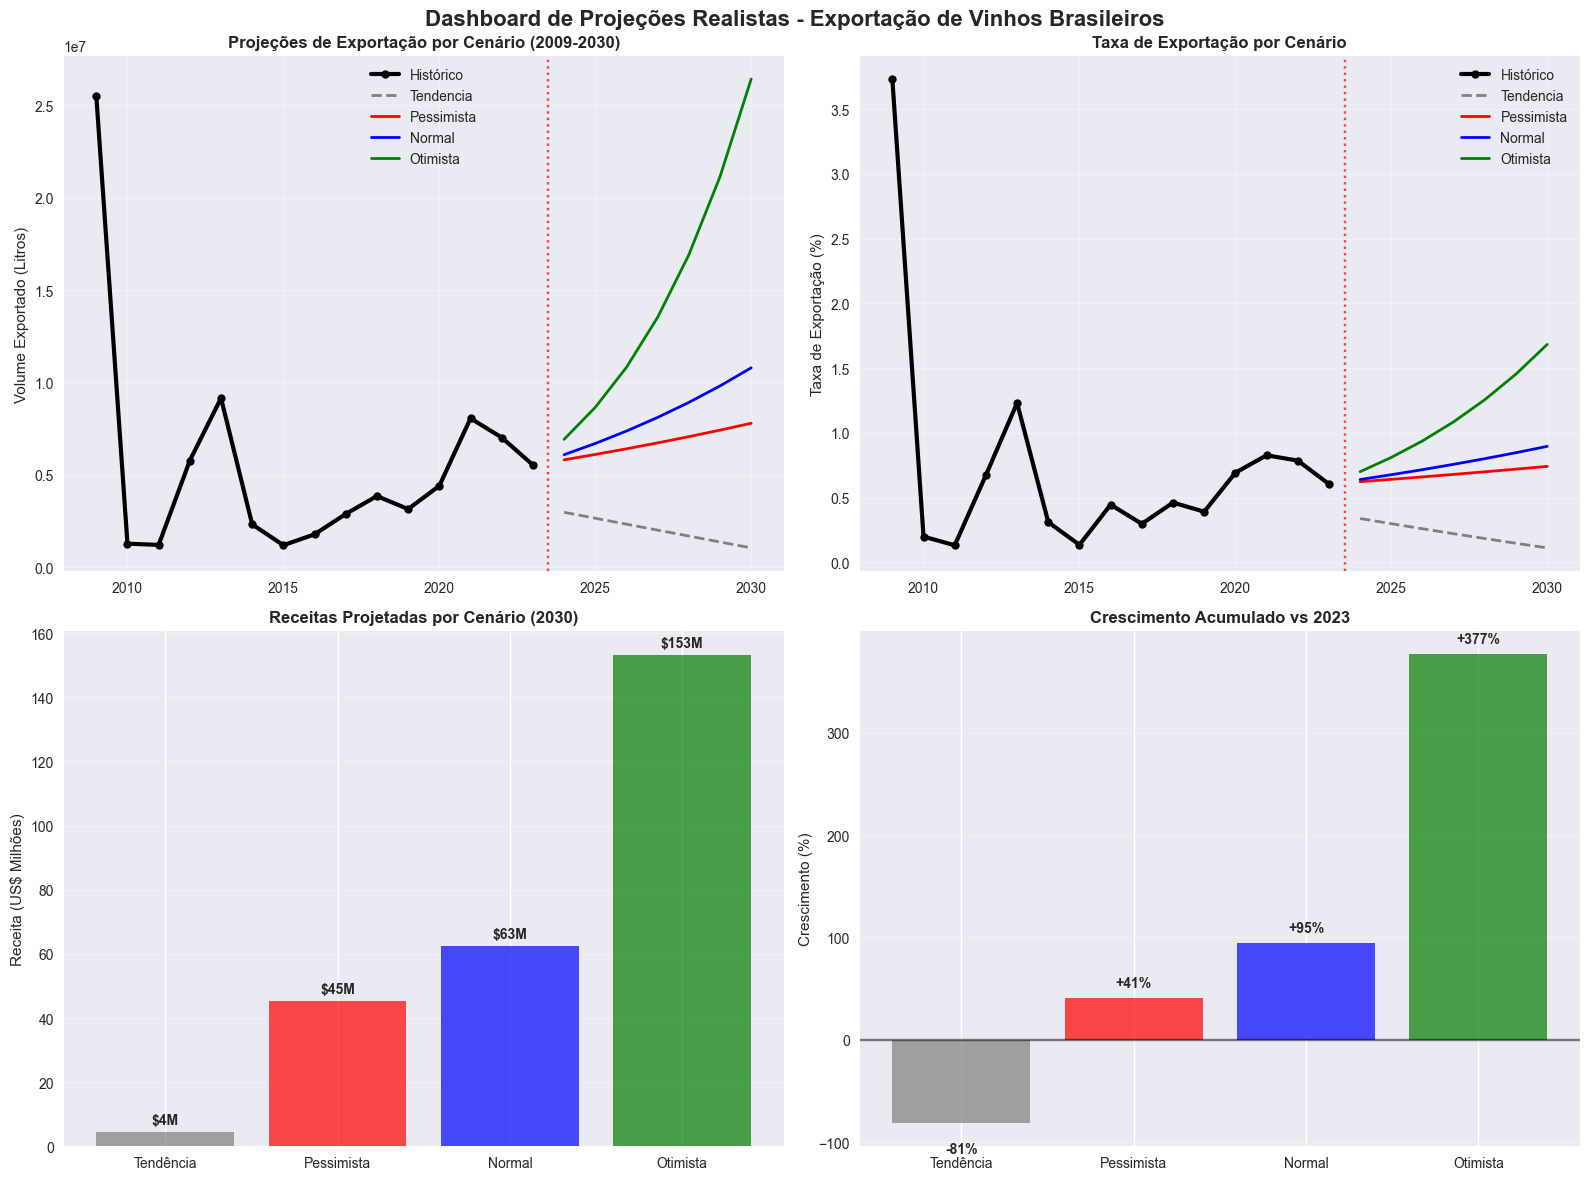

In [7]:
# Dashboard com gráficos das projeções
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. Evolução das exportações por cenário
ax1.plot(df_historico['Ano'], df_historico['Exportacao'], 'o-', 
         linewidth=3, markersize=6, color='black', label='Histórico')

cores = {'Tendencia': 'gray', 'Pessimista': 'red', 'Normal': 'blue', 'Otimista': 'green'}
estilos = {'Tendencia': '--', 'Pessimista': '-', 'Normal': '-', 'Otimista': '-'}

for cenario in ['Tendencia', 'Pessimista', 'Normal', 'Otimista']:
    ax1.plot(df_projecoes['Ano'], df_projecoes[f'{cenario}_Exportacao'], 
             estilos[cenario], linewidth=2, color=cores[cenario], label=cenario)

ax1.axvline(x=2023.5, color='red', linestyle=':', alpha=0.7)
ax1.set_title('Projeções de Exportação por Cenário (2009-2030)', fontweight='bold')
ax1.set_ylabel('Volume Exportado (Litros)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Taxa de exportação por cenário
taxa_historica = (df_historico['Exportacao'] / df_historico['Producao']) * 100
ax2.plot(df_historico['Ano'], taxa_historica, 'o-', 
         linewidth=3, markersize=6, color='black', label='Histórico')

for cenario in ['Tendencia', 'Pessimista', 'Normal', 'Otimista']:
    ax2.plot(df_projecoes['Ano'], df_projecoes[f'{cenario}_Taxa'], 
             estilos[cenario], linewidth=2, color=cores[cenario], label=cenario)

ax2.axvline(x=2023.5, color='red', linestyle=':', alpha=0.7)
ax2.set_title('Taxa de Exportação por Cenário', fontweight='bold')
ax2.set_ylabel('Taxa de Exportação (%)')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Receitas projetadas (2030)
cenarios_nomes = ['Tendência', 'Pessimista', 'Normal', 'Otimista']
receitas_valores = [receitas_2030[c]/1e6 for c in ['Tendencia', 'Pessimista', 'Normal', 'Otimista']]
cores_barras = [cores[c] for c in ['Tendencia', 'Pessimista', 'Normal', 'Otimista']]

bars = ax3.bar(cenarios_nomes, receitas_valores, color=cores_barras, alpha=0.7)
ax3.set_title('Receitas Projetadas por Cenário (2030)', fontweight='bold')
ax3.set_ylabel('Receita (US$ Milhões)')
ax3.grid(True, alpha=0.3, axis='y')

# Adicionar valores nas barras
for bar, valor in zip(bars, receitas_valores):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + max(receitas_valores)*0.01,
             f'${valor:.0f}M', ha='center', va='bottom', fontweight='bold')

# 4. Comparação de crescimento acumulado
crescimentos = []
for cenario in ['Tendencia', 'Pessimista', 'Normal', 'Otimista']:
    valor_2030 = df_projecoes[f'{cenario}_Exportacao'].iloc[-1]
    crescimento = ((valor_2030 / volume_base_2023) - 1) * 100
    crescimentos.append(crescimento)

bars2 = ax4.bar(cenarios_nomes, crescimentos, color=cores_barras, alpha=0.7)
ax4.set_title('Crescimento Acumulado vs 2023', fontweight='bold')
ax4.set_ylabel('Crescimento (%)')
ax4.axhline(y=0, color='black', linestyle='-', alpha=0.5)
ax4.grid(True, alpha=0.3, axis='y')

# Adicionar valores nas barras
for bar, valor in zip(bars2, crescimentos):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height + (max(crescimentos)*0.02 if height > 0 else -max(crescimentos)*0.05),
             f'{valor:+.0f}%', ha='center', va='bottom' if height > 0 else 'top', fontweight='bold')

plt.suptitle('Dashboard de Projeções Realistas - Exportação de Vinhos Brasileiros', 
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

## 7. Projeções por Mercado Estratégico

In [8]:
# Análise dos principais mercados atuais e potenciais
df_exp_paises = df_exportacao[df_exportacao['País'] != 'Brasil'].copy()
df_exp_paises['Total_2019_2023'] = 0

for ano in ['2019', '2020', '2021', '2022', '2023']:
    if ano in df_exp_paises.columns:
        df_exp_paises['Total_2019_2023'] += pd.to_numeric(df_exp_paises[ano], errors='coerce').fillna(0)

top_mercados = df_exp_paises[df_exp_paises['Total_2019_2023'] > 0].nlargest(10, 'Total_2019_2023')

# Projeções de crescimento por mercado
crescimento_por_mercado = {
    'Paraguai': {'pessimista': 0.03, 'normal': 0.08, 'otimista': 0.15},
    'Estados Unidos': {'pessimista': 0.08, 'normal': 0.15, 'otimista': 0.30},
    'Alemanha': {'pessimista': 0.05, 'normal': 0.12, 'otimista': 0.25},
    'Reino Unido': {'pessimista': 0.06, 'normal': 0.14, 'otimista': 0.28},
    'China': {'pessimista': 0.15, 'normal': 0.35, 'otimista': 0.60},
    'Japão': {'pessimista': 0.10, 'normal': 0.25, 'otimista': 0.45},
    'França': {'pessimista': 0.02, 'normal': 0.08, 'otimista': 0.18},
    'Canadá': {'pessimista': 0.07, 'normal': 0.16, 'otimista': 0.32},
    'Itália': {'pessimista': 0.03, 'normal': 0.10, 'otimista': 0.22},
    'Outros': {'pessimista': 0.10, 'normal': 0.20, 'otimista': 0.40}
}

print("PROJEÇÕES POR MERCADO ESTRATÉGICO (2030):")
print("=" * 70)
print(f"{'País':<20} {'Base 2023':<12} {'Pessimista':<12} {'Normal':<12} {'Otimista':<12}")
print("-" * 70)

for _, row in top_mercados.head(8).iterrows():
    pais = row['País']
    volume_base = row['Total_2019_2023'] / 5  # Média anual como base
    
    crescimentos = crescimento_por_mercado.get(pais, crescimento_por_mercado['Outros'])
    
    # Projeções para 2030 (7 anos)
    proj_pess = volume_base * ((1 + crescimentos['pessimista']) ** 7)
    proj_norm = volume_base * ((1 + crescimentos['normal']) ** 7)
    proj_otim = volume_base * ((1 + crescimentos['otimista']) ** 7)
    
    print(f"{pais:<20} {volume_base:>10,.0f} {proj_pess:>10,.0f} {proj_norm:>10,.0f} {proj_otim:>10,.0f}")

# Novos mercados emergentes
novos_mercados = {
    'Coreia do Sul': {'volume_inicial': 20000, 'crescimento': {'pessimista': 0.20, 'normal': 0.40, 'otimista': 0.70}},
    'Singapura': {'volume_inicial': 15000, 'crescimento': {'pessimista': 0.15, 'normal': 0.35, 'otimista': 0.60}},
    'Emirados Árabes': {'volume_inicial': 12000, 'crescimento': {'pessimista': 0.12, 'normal': 0.30, 'otimista': 0.55}},
    'México': {'volume_inicial': 18000, 'crescimento': {'pessimista': 0.10, 'normal': 0.25, 'otimista': 0.45}},
    'Austrália': {'volume_inicial': 16000, 'crescimento': {'pessimista': 0.08, 'normal': 0.20, 'otimista': 0.40}}
}

print("\nNOVOS MERCADOS EMERGENTES - PROJEÇÕES 2030:")
print("=" * 60)
print(f"{'Mercado':<20} {'Pessimista':<12} {'Normal':<12} {'Otimista':<12}")
print("-" * 60)

for mercado, dados in novos_mercados.items():
    volume_inicial = dados['volume_inicial']
    crescimentos = dados['crescimento']
    
    proj_pess = volume_inicial * ((1 + crescimentos['pessimista']) ** 7)
    proj_norm = volume_inicial * ((1 + crescimentos['normal']) ** 7)
    proj_otim = volume_inicial * ((1 + crescimentos['otimista']) ** 7)
    
    print(f"{mercado:<20} {proj_pess:>10,.0f} {proj_norm:>10,.0f} {proj_otim:>10,.0f}")

# Concentração de mercado
print("\nANÁLISE DE CONCENTRAÇÃO:")
print("=" * 25)
total_atual = top_mercados['Total_2019_2023'].sum()
top3_atual = top_mercados.head(3)['Total_2019_2023'].sum()
concentracao_atual = (top3_atual / total_atual) * 100

print(f"Concentração atual (top 3): {concentracao_atual:.1f}%")
print(f"Recomendação: Reduzir para menos de 50% até 2030")
print(f"Estratégia: Diversificar para mercados asiáticos e africanos")

PROJEÇÕES POR MERCADO ESTRATÉGICO (2030):
País                 Base 2023    Pessimista   Normal       Otimista    
----------------------------------------------------------------------
Paraguai              4,219,625  5,189,607  7,231,696 11,224,286
Haiti                   452,906    882,585  1,622,843  4,774,237
Uruguai                 221,233    431,120    792,717  2,332,092
Estados Unidos          214,248    367,183    569,904  1,344,374
China                    98,660    262,438    806,266  2,648,390
Rússia                   49,888     97,218    178,758    525,887
Venezuela                38,950     75,903    139,566    410,588
Curaçao                  35,997     70,148    128,983    379,455

NOVOS MERCADOS EMERGENTES - PROJEÇÕES 2030:
Mercado              Pessimista   Normal       Otimista    
------------------------------------------------------------
Coreia do Sul            71,664    210,827    820,677
Singapura                39,900    122,582    402,653
Emirados Árabes     

## 8. Cronograma de Implementação das Recomendações

In [9]:
# Cronograma realista de implementação (2024-2030)
cronograma_implementacao = {
    2024: {
        'foco': 'Estruturação e Planejamento',
        'acoes': [
            'Criação do programa Brasil Wines',
            'Mapeamento de mercados prioritários',
            'Início das certificações de qualidade',
            'Estruturação de parcerias logísticas'
        ],
        'investimento': 20_000_000,
        'meta_crescimento': 0.08
    },
    2025: {
        'foco': 'Qualidade e Certificação',
        'acoes': [
            'Implementação de certificações internacionais',
            'Melhoria de processos produtivos',
            'Treinamento de produtores',
            'Desenvolvimento de vinhos premium'
        ],
        'investimento': 35_000_000,
        'meta_crescimento': 0.12
    },
    2026: {
        'foco': 'Marketing e Promoção Internacional',
        'acoes': [
            'Lançamento da marca Brasil Wines',
            'Participação em feiras internacionais',
            'Campanhas de marketing digital',
            'Parcerias com importadores'
        ],
        'investimento': 25_000_000,
        'meta_crescimento': 0.15
    },
    2027: {
        'foco': 'Diversificação Geográfica',
        'acoes': [
            'Entrada em mercados asiáticos',
            'Estabelecimento de distribuidores regionais',
            'Adaptação de produtos para mercados locais',
            'Negociação de acordos comerciais'
        ],
        'investimento': 30_000_000,
        'meta_crescimento': 0.18
    },
    2028: {
        'foco': 'Inovação e Sustentabilidade',
        'acoes': [
            'Desenvolvimento de vinhos orgânicos',
            'Implementação de tecnologias sustentáveis',
            'Certificações ambientais',
            'Inovação em embalagens'
        ],
        'investimento': 28_000_000,
        'meta_crescimento': 0.20
    },
    2029: {
        'foco': 'Consolidação e Expansão',
        'acoes': [
            'Consolidação das melhorias implementadas',
            'Expansão para novos mercados africanos',
            'Otimização de processos',
            'Desenvolvimento de produtos premium'
        ],
        'investimento': 15_000_000,
        'meta_crescimento': 0.22
    },
    2030: {
        'foco': 'Liderança e Reconhecimento',
        'acoes': [
            'Posicionamento como referência sul-americana',
            'Reconhecimento internacional da qualidade',
            'Sustentabilidade em 100% da produção exportada',
            'Planejamento para próxima década'
        ],
        'investimento': 12_000_000,
        'meta_crescimento': 0.25
    }
}

print("CRONOGRAMA DE IMPLEMENTAÇÃO DAS RECOMENDAÇÕES:")
print("=" * 60)

investimento_total_cronograma = 0
for ano, dados in cronograma_implementacao.items():
    investimento_total_cronograma += dados['investimento']
    
    print(f"\n{ano} - {dados['foco']}")
    print(f"Investimento: US$ {dados['investimento']/1e6:.0f}M")
    print(f"Meta de crescimento: {dados['meta_crescimento']*100:.0f}%")
    print("Ações principais:")
    for acao in dados['acoes']:
        print(f"  • {acao}")

print(f"\nINVESTIMENTO TOTAL DO CRONOGRAMA: US$ {investimento_total_cronograma/1e6:.0f}M")

# Marcos de acompanhamento
print("\nMARCOS DE ACOMPANHAMENTO:")
print("=" * 30)
print("2024: Estruturas básicas implementadas")
print("2025: Primeiras certificações obtidas")
print("2026: Marca Brasil Wines reconhecida")
print("2027: Presença em 5 novos mercados")
print("2028: 50% da produção exportada certificada")
print("2029: Taxa de exportação > 5%")
print("2030: Reconhecimento internacional consolidado")

CRONOGRAMA DE IMPLEMENTAÇÃO DAS RECOMENDAÇÕES:

2024 - Estruturação e Planejamento
Investimento: US$ 20M
Meta de crescimento: 8%
Ações principais:
  • Criação do programa Brasil Wines
  • Mapeamento de mercados prioritários
  • Início das certificações de qualidade
  • Estruturação de parcerias logísticas

2025 - Qualidade e Certificação
Investimento: US$ 35M
Meta de crescimento: 12%
Ações principais:
  • Implementação de certificações internacionais
  • Melhoria de processos produtivos
  • Treinamento de produtores
  • Desenvolvimento de vinhos premium

2026 - Marketing e Promoção Internacional
Investimento: US$ 25M
Meta de crescimento: 15%
Ações principais:
  • Lançamento da marca Brasil Wines
  • Participação em feiras internacionais
  • Campanhas de marketing digital
  • Parcerias com importadores

2027 - Diversificação Geográfica
Investimento: US$ 30M
Meta de crescimento: 18%
Ações principais:
  • Entrada em mercados asiáticos
  • Estabelecimento de distribuidores regionais
  • Ad

## 9. Síntese Executiva das Projeções Realistas

In [10]:
# Síntese final com principais resultados
print("SÍNTESE EXECUTIVA - PROJEÇÕES REALISTAS PARA EXPORTAÇÃO DE VINHOS")
print("=" * 75)

print("\n1. CENÁRIOS DE CRESCIMENTO (2024-2030):")
print("   Baseados em implementação gradual das recomendações de melhoria")
print()
for cenario in ['Pessimista', 'Normal', 'Otimista']:
    volume_2030 = df_projecoes[f'{cenario}_Exportacao'].iloc[-1]
    receita_2030 = receitas_2030[cenario]
    crescimento = ((volume_2030 / volume_base_2023) - 1) * 100
    cagr = ((volume_2030 / volume_base_2023) ** (1/7) - 1) * 100
    taxa_2030 = df_projecoes[f'{cenario}_Taxa'].iloc[-1]
    
    print(f"   {cenario.upper()}:")
    print(f"     Volume 2030: {volume_2030:,.0f} litros ({crescimento:+.0f}% vs 2023)")
    print(f"     CAGR: {cagr:+.1f}% ao ano")
    print(f"     Receita 2030: US$ {receita_2030/1e6:.0f} milhões")
    print(f"     Taxa de exportação: {taxa_2030:.1f}%")
    print()

print("2. INVESTIMENTOS NECESSÁRIOS:")
print(f"   Total: US$ {investimento_total_cronograma/1e6:.0f} milhões (2024-2030)")
print("   Distribuição:")
for recomendacao, valor in investimentos_recomendacoes.items():
    percentual = (valor / investimento_total) * 100
    print(f"     {recomendacao}: US$ {valor/1e6:.0f}M ({percentual:.0f}%)")

print("\n3. RETORNO SOBRE INVESTIMENTO:")
for cenario in ['Pessimista', 'Normal', 'Otimista']:
    receita_cenario = receitas_2030[cenario]
    receita_tendencia = receitas_2030['Tendencia']
    ganho_adicional = receita_cenario - receita_tendencia
    roi = (ganho_adicional - investimento_total_cronograma) / investimento_total_cronograma * 100
    print(f"   {cenario}: ROI = {roi:+.0f}%")

print("\n4. IMPACTO SOCIOECONÔMICO (Cenário Normal):")
receita_adicional_normal = receitas_2030['Normal'] - receitas_2030['Tendencia']
novos_empregos_normal = (receita_adicional_normal / 1e6) * 8
impacto_pib = receita_adicional_normal * 2.2  # Multiplicador PIB

print(f"   Receita adicional: US$ {receita_adicional_normal/1e6:.0f} milhões")
print(f"   Novos empregos: {novos_empregos_normal:,.0f}")
print(f"   Impacto no PIB: US$ {impacto_pib/1e6:.0f} milhões")

print("\n5. PRINCIPAIS MERCADOS ALVO:")
print("   Consolidação: Paraguai, Estados Unidos, Alemanha")
print("   Expansão: China, Japão, Reino Unido, Canadá")
print("   Novos: Coreia do Sul, Singapura, Emirados Árabes")

print("\n6. FATORES CRÍTICOS DE SUCESSO:")
print("   • Implementação coordenada das recomendações")
print("   • Manutenção da qualidade durante expansão")
print("   • Diversificação geográfica efetiva")
print("   • Investimento sustentado em marketing")
print("   • Adaptação às mudanças climáticas")
print("   • Políticas públicas de apoio")

print("\n7. RISCOS IDENTIFICADOS:")
print("   • Volatilidade econômica global")
print("   • Mudanças climáticas extremas")
print("   • Competição acirrada com outros países")
print("   • Barreiras comerciais")
print("   • Flutuações cambiais")

# Salvar projeções
df_projecoes.to_csv('projecoes_realistas_exportacao_vinhos.csv', index=False)

print("\nARQUIVO GERADO:")
print("• projecoes_realistas_exportacao_vinhos.csv")
print("\nPROJEÇÕES REALISTAS FINALIZADAS")
print("Recomendação: Implementar cenário NORMAL como meta principal")
print(f"Meta 2030: {df_projecoes['Normal_Exportacao'].iloc[-1]:,.0f} litros de exportação")

SÍNTESE EXECUTIVA - PROJEÇÕES REALISTAS PARA EXPORTAÇÃO DE VINHOS

1. CENÁRIOS DE CRESCIMENTO (2024-2030):
   Baseados em implementação gradual das recomendações de melhoria

   PESSIMISTA:
     Volume 2030: 7,793,772 litros (+41% vs 2023)
     CAGR: +5.0% ao ano
     Receita 2030: US$ 45 milhões
     Taxa de exportação: 0.7%

   NORMAL:
     Volume 2030: 10,793,726 litros (+95% vs 2023)
     CAGR: +10.0% ao ano
     Receita 2030: US$ 63 milhões
     Taxa de exportação: 0.9%

   OTIMISTA:
     Volume 2030: 26,411,476 litros (+377% vs 2023)
     CAGR: +25.0% ao ano
     Receita 2030: US$ 153 milhões
     Taxa de exportação: 1.7%

2. INVESTIMENTOS NECESSÁRIOS:
   Total: US$ 165 milhões (2024-2030)
   Distribuição:
     Diversificação Geográfica: US$ 25M (17%)
     Qualidade e Certificação: US$ 40M (28%)
     Marketing Internacional: US$ 30M (21%)
     Políticas Públicas: US$ 15M (10%)
     Inovação e Sustentabilidade: US$ 35M (24%)

3. RETORNO SOBRE INVESTIMENTO:
   Pessimista: ROI = -75